## Installing the SpaCy library (the most important library wich we will use)

In [3]:
pip install -U spacy==3.*

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.8.4                         
Location         C:\Users\vinicius23011\AppData\Roaming\Python\Python310\site-packages\spacy
Platform         Windows-10-10.0.22621-SP0     
Python version   3.10.8                        
Pipelines        en_core_web_sm (3.8.0)        



## Part 1: Learning the basics: Preprocessing, Basic Vetorization, Modelling Overview

In [2]:
 import spacy

Now, how we saw on the guide ``ipynb``, by James Almeida, we need to load a suitable statistical model for our project. On the tutorial, the Professor begins with the **en_core_web_sm** model, the smallest English model from SpaCy, a good start for do NLP tasks. But what really does the **en_core_web_sm** model? Biefly, this model is trained using structuring written text like blogs, news, and comments. Thus, is ideal for this goals, and is **desgined for fast processing on CPU's**. Is a Small Model, like the name suggests ("sm"), with 12 MB . Is trained on real-world web text (OntoNotes 5, WordNet). And generally, has a High Accuracy, especially for POS tagging (~97%) and parsing (~90%) it's free and open access (MIT License). At this point, we need to know that this model is a good starting point for our **first tests**, BUT, probably, for our corpus, that has a semiconductor properties target, is most appropriate use a large model, trained for our applications, i. e., research articles.

In [6]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 8.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
nlp = spacy.load('en_core_web_sm')

Other vailable spaCy models at these links:<br>
https://spacy.io/models<br>
https://spacy.io/usage/models

Now, the ``nlp`` variable references a **Language** class. (contains language specific rules for various tasks, for example, tokenization. And, a processing pipeline)

In [4]:
type(nlp)

spacy.lang.en.English

### Tokenization
https://www.nlpdemystified.org/course/tokenization


We pass whatever text we want to process to _nlp_, which returns a **Doc** object. The **Doc** is a container that stores processed text along with its linguistic annotations. It is created automatically when text is passed to the `nlp` function and allows easy access to tokens, sentences, and named entities. 

The **Doc** object supports various features. It handles **tokenization**, breaking text into individual words (tokens), and provides **annotations**, where each token contains grammatical and syntactic details. It also enables **sentence segmentation**, identifying separate sentences, and **named entity recognition (NER)**, detecting names, locations, dates, and other entities. Additionally, it supports **lemmatization**, converting words to their base forms (e.g., "running" → "run"), and **dependency parsing**, understanding relationships between words. 

To use it, we can create a **Doc** by passing text to an `nlp` pipeline:  
`import spacy`  
`nlp = spacy.load("en_core_web_sm")`  
`doc = nlp("Hello world!")`  
From this, we can access tokens (`doc[0]` → "Hello"), named entities (`doc.ents`), and sentences (`doc.sents`).  

It is also possible to create a **custom Doc** manually:  
`from spacy.tokens import Doc`  
`words = ["Hello", "world", "!"]`  
`spaces = [True, False, False]`  
`doc = Doc(nlp.vocab, words=words, spaces=spaces)`  

The **Doc** object allows iteration (`for token in doc`), slicing (`doc[1:3]` to extract a part of a document), and exporting data in different formats such as arrays, JSON, or binary. It also supports **custom extensions**, letting users define new attributes (`doc._.custom_attr`).  

In summary, the **Doc** object is how spaCy structures and organizes text, making it easier to process and extract meaningful information from it.


A **Doc** object contains **Token** and **Span** objects, which are essential components of text processing in spaCy. A **Token** represents a single unit in a text, such as a word, punctuation mark, or whitespace. Each token carries various attributes like its **text content** (`token.text`), **position in the sentence**, and **grammatical properties** such as **part of speech (POS)** and **dependency labels**. Tokens can be accessed within a `Doc` using indexing (`doc[0]` for the first token) or iterated over in a loop (`for token in doc`). Additionally, tokens support **custom attributes**, which can be added using `Token.set_extension()`, allowing users to define additional metadata. 

A **Span** represents a slice of text within a `Doc`, consisting of multiple tokens. Spans are useful for grouping words together, such as **named entities** (e.g., "New York" as a single unit). A span can be created by slicing a `Doc` (`doc[1:4]` selects three tokens). Like tokens, spans support **custom attributes** and can be used to extract **noun phrases, entity mentions, or syntactic chunks**. 

To use Token and Span in practice, we first create a `Doc` object by loading a spaCy pipeline. For example, `doc = nlp("Give it back! He pleaded.")` allows us to access tokens and spans within the text. The first token can be retrieved with `doc[0]`, which will return "Give". A span can be created by selecting a range of tokens, such as `doc[1:4]`, which will return "it back!". Additionally, we can define custom attributes for tokens and spans. For instance, setting an attribute to indicate if a token is a fruit can be done with `Token.set_extension("is_fruit", default=False)`, and then assigning `doc[3]._.is_fruit = True`. Checking this attribute will return `True`. Similarly, we can set a custom span attribute to detect if a span contains a city name using `Span.set_extension("has_city", getter=lambda span: "New York" in span.text)`. If we apply this to a span, `span._.has_city` will return `False` unless "New York" is within the selected span. 

Token objects can identify **semantic similarity** between words, retrieve **morphological information** like tense and number, access **syntactic relationships** (e.g., parent-child relations in a dependency tree), and use **word embeddings** for vector-based comparisons. Span objects enable the extraction of **named entities**, identification of **noun phrases** and **syntactic structures**, and sentence and phrase-level **semantic analysis**. Both **Token** and **Span** objects play a crucial role in **natural language understanding (NLU)**, making spaCy a powerful tool for **text analysis, entity recognition, and language modeling**.


## Trying to tokenize the articles titles from our corpus using encore_web_sm

In [5]:
import pandas as pd

# Load the Excel file
file_path = "../data (corpus)/data_mesh.xlsx"
xls = pd.ExcelFile(file_path)

xls.sheet_names


['Sheet1']

In [6]:
# Load the first sheet
df = xls.parse('Sheet1')

# View the first arrows
df.head()


,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Brunthaler, G; Lindner, B; Pillwein, G; Griess...",NaN,NaN,NaN,"Brunthaler, G; Lindner, B; Pillwein, G; Griess...",NaN,NaN,Two-dimensional metallic state in silicon-on-i...,PHYSICA E-LOW-DIMENSIONAL SYSTEMS & NANOSTRUCT...,...,NaN,Science & Technology - Other Topics; Physics,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000221140800060,0
1,C,"Pyragas, V; Lisauskas, V; Sliuziene, K; Vengal...",NaN,"Grigonis, A",NaN,"Pyragas, V.; Lisauskas, V.; Sliuziene, K.; Ven...",NaN,NaN,ELECTRICAL PROPERTIES OF NONSTOICHIOMETRIC In2...,3RD INTERNATIONAL CONFERENCE RADIATION INTERAC...,...,NaN,Materials Science; Nuclear Science & Technology,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000309143200075,0
2,J,"Qi, F; Chen, YF; Zheng, BJ; He, JR; Li, Q; Wan...",NaN,NaN,NaN,"Qi, Fei; Chen, Yuanfu; Zheng, Binjie; He, Jiar...",NaN,NaN,Hierarchical architecture of ReS2/rGO composit...,APPLIED SURFACE SCIENCE,...,NaN,Chemistry; Materials Science; Physics,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000401680200016,0
3,J,"Wang, YX; Zhao, XY; Lü, SQ; Meng, XW; Zhang, Y...",NaN,NaN,NaN,"Wang, Yaxin; Zhao, Xiaoyu; Lu, Shiquan; Meng, ...",NaN,NaN,Synthesis and characterization of SmSrCo2-xMnx...,CERAMICS INTERNATIONAL,...,NaN,Materials Science,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000337015300147,0
4,J,"Manousou, DK; Gardelis, S; Calamiotou, M; Sysk...",NaN,NaN,NaN,"Manousou, Dimitra K.; Gardelis, Spiros; Calami...",NaN,NaN,VO2 thin films fabricated by reduction of ther...,MATERIALS LETTERS,...,NaN,Materials Science; Physics,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000670371300017,0


In [7]:
import spacy

# Loading the small NLP  model from spaCy
nlp = spacy.load("en_core_web_sm")

# Select the articles title column
text_column = "Article Title"

# Verify if the column exists on DataFrame
if text_column in df.columns:
    # Tokenize the Article Titles
    df["Title_Tokens"] = df[text_column].dropna().apply(lambda text: list(nlp(text)))
    
    # See the firsts results
    print(df[[text_column, "Title_Tokens"]].head())
else:
    df = None  # If doesn't exist the column, none processing is realized.

df.head() if df is not None else "Text column not found."


                                       Article Title  \
0  Two-dimensional metallic state in silicon-on-i...   
1  ELECTRICAL PROPERTIES OF NONSTOICHIOMETRIC In2...   
2  Hierarchical architecture of ReS2/rGO composit...   
3  Synthesis and characterization of SmSrCo2-xMnx...   
4  VO2 thin films fabricated by reduction of ther...   

                                        Title_Tokens  
0  [Two, -, dimensional, metallic, state, in, sil...  
1  [ELECTRICAL, PROPERTIES, OF, NONSTOICHIOMETRIC...  
2  [Hierarchical, architecture, of, ReS2, /, rGO,...  
3  [Synthesis, and, characterization, of, SmSrCo2...  
4  [VO2, thin, films, fabricated, by, reduction, ...  


,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Title_Tokens
0,J,"Brunthaler, G; Lindner, B; Pillwein, G; Griess...",NaN,NaN,NaN,"Brunthaler, G; Lindner, B; Pillwein, G; Griess...",NaN,NaN,Two-dimensional metallic state in silicon-on-i...,PHYSICA E-LOW-DIMENSIONAL SYSTEMS & NANOSTRUCT...,...,Science & Technology - Other Topics; Physics,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000221140800060,0,"[Two, -, dimensional, metallic, state, in, sil..."
1,C,"Pyragas, V; Lisauskas, V; Sliuziene, K; Vengal...",NaN,"Grigonis, A",NaN,"Pyragas, V.; Lisauskas, V.; Sliuziene, K.; Ven...",NaN,NaN,ELECTRICAL PROPERTIES OF NONSTOICHIOMETRIC In2...,3RD INTERNATIONAL CONFERENCE RADIATION INTERAC...,...,Materials Science; Nuclear Science & Technology,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000309143200075,0,"[ELECTRICAL, PROPERTIES, OF, NONSTOICHIOMETRIC..."
2,J,"Qi, F; Chen, YF; Zheng, BJ; He, JR; Li, Q; Wan...",NaN,NaN,NaN,"Qi, Fei; Chen, Yuanfu; Zheng, Binjie; He, Jiar...",NaN,NaN,Hierarchical architecture of ReS2/rGO composit...,APPLIED SURFACE SCIENCE,...,Chemistry; Materials Science; Physics,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000401680200016,0,"[Hierarchical, architecture, of, ReS2, /, rGO,..."
3,J,"Wang, YX; Zhao, XY; Lü, SQ; Meng, XW; Zhang, Y...",NaN,NaN,NaN,"Wang, Yaxin; Zhao, Xiaoyu; Lu, Shiquan; Meng, ...",NaN,NaN,Synthesis and characterization of SmSrCo2-xMnx...,CERAMICS INTERNATIONAL,...,Materials Science,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000337015300147,0,"[Synthesis, and, characterization, of, SmSrCo2..."
4,J,"Manousou, DK; Gardelis, S; Calamiotou, M; Sysk...",NaN,NaN,NaN,"Manousou, Dimitra K.; Gardelis, Spiros; Calami...",NaN,NaN,VO2 thin films fabricated by reduction of ther...,MATERIALS LETTERS,...,Materials Science; Physics,NaN,NaN,NaN,NaN,NaN,2025-03-11,WOS:000670371300017,0,"[VO2, thin, films, fabricated, by, reduction, ..."


## Case-folding

In [8]:
df["Title_Tokens_Lower"] = df["Title_Tokens"].apply(lambda tokens: [t.lower_ for t in tokens])

In [9]:
df['Title_Tokens_Lower']

0       [two, -, dimensional, metallic, state, in, sil...
1       [electrical, properties, of, nonstoichiometric...
2       [hierarchical, architecture, of, res2, /, rgo,...
3       [synthesis, and, characterization, of, smsrco2...
4       [vo2, thin, films, fabricated, by, reduction, ...
                              ...                        
4995    [zintl, phases, :, from, curiosities, to, impa...
4996    [ultrathin, metallic, -, phase, molybdenum, di...
4997    [progress, in, electric, field, control, of, m...
4998    [thermal, transport, in, zno, nanocrystal, net...
4999    [scattering, mechanisms, in, shallow, undoped,...
Name: Title_Tokens_Lower, Length: 5000, dtype: object

### Stop Word Removal

In [10]:
print(nlp.Defaults.stop_words)
print(len(nlp.Defaults.stop_words))

{'of', 'ten', 'thereupon', 'myself', 'by', 'whole', 'them', 'hereby', 'two', 'in', 'may', 'whither', 'doing', '’ve', 'twenty', 'therefore', 'him', 'might', 'alone', 'three', 'too', 'due', 'elsewhere', 'herself', 'beyond', 'something', 'except', 'now', 'how', 'with', 'within', 'various', 'least', "n't", 'which', 'and', 'from', 'behind', 'former', 'whereupon', 'been', 'yours', 'another', 'but', 'or', 'almost', 'because', 'we', 'amount', 'quite', 'its', 'besides', 'latter', '’m', 'hereupon', 'her', 'thereby', 'used', 'nobody', 'whose', 'cannot', 'at', 'anything', 'itself', 'next', 'otherwise', 'has', 'will', 'really', '‘d', 'do', 'toward', 'around', 'moreover', 'yourself', 'whom', 'eleven', 'always', 'us', 'i', 'after', 'wherever', 'over', 'did', 'both', 'yourselves', 'without', 'across', 'nor', 'already', 'each', 'anyway', 'through', 'here', 'last', 'so', 'less', 'made', 'ever', 'even', 'fifty', 'up', 'nothing', 'under', 'while', 'a', 'none', 'someone', 'what', 'please', 'noone', 'to', '

In [11]:
df["Title_Tokens_Lower_not_start"] = df["Title_Tokens"].apply(
    lambda tokens: nlp(" ".join([t.text if t.is_sent_start else t.lower_ for t in tokens]))
)

In [12]:
df["Title_Tokens_Lower_not_start_no_sw"] = df["Title_Tokens_Lower_not_start"].apply(lambda tokens: [t for t in tokens if not t.is_stop])

In [13]:
df["Title_Tokens_Lower_not_start"]

0       (Two, -, dimensional, metallic, state, in, sil...
1       (ELECTRICAL, properties, of, nonstoichiometric...
2       (Hierarchical, architecture, of, res2, /, rgo,...
3       (Synthesis, and, characterization, of, smsrco2...
4       (VO2, thin, films, fabricated, by, reduction, ...
                              ...                        
4995    (Zintl, phases, :, from, curiosities, to, impa...
4996    (Ultrathin, metallic, -, phase, molybdenum, di...
4997    (Progress, in, electric, field, control, of, m...
4998    (Thermal, transport, in, zno, nanocrystal, net...
4999    (Scattering, mechanisms, in, shallow, undoped,...
Name: Title_Tokens_Lower_not_start, Length: 5000, dtype: object

In [14]:
df["Title_Tokens_Lower_not_start_no_sw"]

0       [-, dimensional, metallic, state, silicon, -, ...
1       [ELECTRICAL, properties, nonstoichiometric, in...
2       [Hierarchical, architecture, res2, /, rgo, com...
3       [Synthesis, characterization, smsrco2, -, xmnx...
4       [VO2, thin, films, fabricated, reduction, ther...
                              ...                        
4995    [Zintl, phases, :, curiosities, impactful, mat...
4996    [Ultrathin, metallic, -, phase, molybdenum, di...
4997    [Progress, electric, field, control, magnetism...
4998    [Thermal, transport, zno, nanocrystal, network...
4999    [Scattering, mechanisms, shallow, undoped, si,...
Name: Title_Tokens_Lower_not_start_no_sw, Length: 5000, dtype: object

In [15]:
df["Title_Tokens_Lower_not_start_no_sw_filtered"] = df["Title_Tokens_Lower_not_start_no_sw"].apply(lambda tokens: [t for t in tokens if not t.is_punct and "-" not in t.text])

In [16]:
df["Title_Tokens_Lower_not_start_no_sw_filtered"] 

0       [dimensional, metallic, state, silicon, insula...
1       [ELECTRICAL, properties, nonstoichiometric, in...
2       [Hierarchical, architecture, res2, rgo, compos...
3       [Synthesis, characterization, smsrco2, xmnxo5+...
4       [VO2, thin, films, fabricated, reduction, ther...
                              ...                        
4995    [Zintl, phases, curiosities, impactful, materi...
4996    [Ultrathin, metallic, phase, molybdenum, disul...
4997    [Progress, electric, field, control, magnetism...
4998    [Thermal, transport, zno, nanocrystal, network...
4999    [Scattering, mechanisms, shallow, undoped, si,...
Name: Title_Tokens_Lower_not_start_no_sw_filtered, Length: 5000, dtype: object

## Extracting sentences in abstracts (just for training)

In [19]:
# Aplica nlp e extrai sentenças, com verificação de nulos
def extract_sentence(text):
    if isinstance(text, str):
        doc = nlp(text)
        return [sent.text for sent in doc.sents]
    else:
        return []  # ou np.nan, dependendo do que você quiser

In [20]:
df["Sentences"] = df["Abstract"].apply(extract_sentence)

0       [In silicon-on-insulator metal oxide semicondu...
1       [Thin films of indium oxide were grown heteroe...
2       [Rhenium disulfide (ReS2), a two-dimensional (...
3       [Double perovskite SmSrCo2-xMnxO5+delta (SSCM,...
4       [VO2 thin films were fabricated by thermal eva...
                              ...                        
4995    [The synthesis of new compounds and crystal st...
4996    [Two-dimensional (2D) ultrathin MoS2 nanosheet...
4997    [Using the spin degree of freedom to realize t...
4998    [Semiconductor materials with independently co...
4999    [We report the magneto-transport study and sca...
Name: Sentences, Length: 5000, dtype: object

## Searching for entities

In [22]:
import spacy

nlp = spacy.load("en_core_web_sm")

# Function that extracts entities named on the title
def extract_entities(text):
    if isinstance(text, str):
        doc = nlp(text)
        return [(ent.text, ent.label_) for ent in doc.ents]
    else:
        return []

# Aplicar no DataFrame
df["Entities_Title"] = df["Article Title"].apply(extract_entities)


In [23]:
df["Entities_Title"]

0                                       [(Two, CARDINAL)]
1                              [(NONSTOICHIOMETRIC, ORG)]
2                                                      []
3       [(SmSrCo2-xMnxO5+δ, LOC), (0.2, CARDINAL), (0....
4                       [(V2O5, PRODUCT), (N2, CARDINAL)]
                              ...                        
4995                             [(Zintl Phases, PERSON)]
4996    [(Ultrathin Metallic-Phase Molybdenum Disulfid...
4997                                                   []
4998                                         [(ZnO, GPE)]
4999                                     [(Si/SiGe, ORG)]
Name: Entities_Title, Length: 5000, dtype: object

## Applying POS tagging and Lemmatization

In [24]:
df["POS_Title"] = df["Article Title"].apply(lambda text: [(token.text, token.pos_) for token in nlp(text)])
df["Lemmas"] = df["Article Title"].apply(lambda text: [token.lemma_ for token in nlp(text)])

In [25]:
df["POS_Title"]

0       [(Two, NUM), (-, PUNCT), (dimensional, ADJ), (...
1       [(ELECTRICAL, PROPN), (PROPERTIES, NOUN), (OF,...
2       [(Hierarchical, ADJ), (architecture, NOUN), (o...
3       [(Synthesis, NOUN), (and, CCONJ), (characteriz...
4       [(VO2, PROPN), (thin, ADJ), (films, NOUN), (fa...
                              ...                        
4995    [(Zintl, PROPN), (Phases, NOUN), (:, PUNCT), (...
4996    [(Ultrathin, PROPN), (Metallic, PROPN), (-, PU...
4997    [(Progress, NOUN), (in, ADP), (electric, ADJ),...
4998    [(Thermal, ADJ), (transport, NOUN), (in, ADP),...
4999    [(Scattering, VERB), (mechanisms, NOUN), (in, ...
Name: POS_Title, Length: 5000, dtype: object

In [26]:
df["Lemmas"]

0       [two, -, dimensional, metallic, state, in, sil...
1       [ELECTRICAL, property, of, NONSTOICHIOMETRIC, ...
2       [hierarchical, architecture, of, ReS2, /, rgo,...
3       [synthesis, and, characterization, of, SmSrCo2...
4       [VO2, thin, film, fabricate, by, reduction, of...
                              ...                        
4995    [Zintl, phase, :, from, curiosity, to, impactf...
4996    [Ultrathin, Metallic, -, Phase, Molybdenum, Di...
4997    [progress, in, electric, field, control, of, m...
4998    [thermal, transport, in, ZnO, nanocrystal, net...
4999    [scatter, mechanism, in, shallow, undope, Si, ...
Name: Lemmas, Length: 5000, dtype: object

## Trying to extract some patterns

In [29]:
def extract_patterns(tokens):
    results = {
        "like_num": [],
        "is_digit": [],
        "is_alpha": []
    }
    for token in tokens:
        if token.like_num:
            results["like_num"].append(token.text)
        if token.is_digit:
            results["is_digit"].append(token.text)
        if token.is_alpha:
            results["is_alpha"].append(token.text)
    return results

# Applies the functio to the column of tokens already processed
df["Title_Token_Patterns"] = df["Title_Tokens"].apply(extract_patterns)

# Example
df[["Article Title", "Title_Tokens", "Title_Token_Patterns"]].head()


,Article Title,Title_Tokens,Title_Token_Patterns
0,Two-dimensional metallic state in silicon-on-i...,"[Two, -, dimensional, metallic, state, in, sil...","{'like_num': ['Two'], 'is_digit': [], 'is_alph..."
1,ELECTRICAL PROPERTIES OF NONSTOICHIOMETRIC In2...,"[ELECTRICAL, PROPERTIES, OF, NONSTOICHIOMETRIC...","{'like_num': [], 'is_digit': [], 'is_alpha': [..."
2,Hierarchical architecture of ReS2/rGO composit...,"[Hierarchical, architecture, of, ReS2, /, rGO,...","{'like_num': [], 'is_digit': [], 'is_alpha': [..."
3,Synthesis and characterization of SmSrCo2-xMnx...,"[Synthesis, and, characterization, of, SmSrCo2...","{'like_num': ['0.2', '0.4', '0.6', '0.8', '1.0..."
4,VO2 thin films fabricated by reduction of ther...,"[VO2, thin, films, fabricated, by, reduction, ...","{'like_num': [], 'is_digit': [], 'is_alpha': [..."


## Analyzing the dependencies

In [30]:

# Função para extrair dependência sintática de cada token no título
def extract_dependencies(tokens):
    dependencies = []
    for token in tokens:
        dependencies.append({
            "text": token.text,
            "dep": token.dep_,
            "head": token.head.text,
            "dep_explained": spacy.explain(token.dep_)
        })
    return dependencies

# Aplica diretamente à coluna que você já criou com os tokens originais dos títulos
df["Dependency_Title"] = df["Title_Tokens"].apply(extract_dependencies)

# Exemplo de visualização dos resultados
print(df[["Article Title", "Dependency_Title"]].head(5))


                                       Article Title  \
0  Two-dimensional metallic state in silicon-on-i...   
1  ELECTRICAL PROPERTIES OF NONSTOICHIOMETRIC In2...   
2  Hierarchical architecture of ReS2/rGO composit...   
3  Synthesis and characterization of SmSrCo2-xMnx...   
4  VO2 thin films fabricated by reduction of ther...   

                                    Dependency_Title  
0  [{'text': 'Two', 'dep': 'advmod', 'head': 'dim...  
1  [{'text': 'ELECTRICAL', 'dep': 'compound', 'he...  
2  [{'text': 'Hierarchical', 'dep': 'amod', 'head...  
3  [{'text': 'Synthesis', 'dep': 'ROOT', 'head': ...  
4  [{'text': 'VO2', 'dep': 'nmod', 'head': 'films...  


In [31]:
# Relações que queremos destacar
desired_rels = {"ROOT", "nsubj", "pobj", "attr", "dobj", "compound"}

def filter_keys_dependencies(tokens):
    results = []
    for token in tokens:
        if token.dep_ in desired_rels:
            results.append({
                "text": token.text,
                "dep": token.dep_,
                "head": token.head.text,
                "exp": spacy.explain(token.dep_)
            })
    return results

# Aplicar no DataFrame usando a coluna original de tokens
df["Dep_Chave_Title"] = df["Title_Tokens"].apply(filter_keys_dependencies)

# Exibir os primeiros exemplos
print(df[["Article Title", "Dep_Chave_Title"]].head(5))


                                       Article Title  \
0  Two-dimensional metallic state in silicon-on-i...   
1  ELECTRICAL PROPERTIES OF NONSTOICHIOMETRIC In2...   
2  Hierarchical architecture of ReS2/rGO composit...   
3  Synthesis and characterization of SmSrCo2-xMnx...   
4  VO2 thin films fabricated by reduction of ther...   

                                     Dep_Chave_Title  
0  [{'text': 'state', 'dep': 'ROOT', 'head': 'sta...  
1  [{'text': 'ELECTRICAL', 'dep': 'compound', 'he...  
2  [{'text': 'architecture', 'dep': 'ROOT', 'head...  
3  [{'text': 'Synthesis', 'dep': 'ROOT', 'head': ...  
4  [{'text': 'films', 'dep': 'nsubj', 'head': 'ev...  


In [32]:
# Função que tenta capturar padrões do tipo "[HEAD] of [OBJECT]"
def padrao_head_of_objeto(tokens):
    padroes = []
    for i, token in enumerate(tokens):
        if token.text.lower() == "of" and i > 0 and i < len(tokens) - 1:
            head = tokens[i - 1]
            objeto = tokens[i + 1]
            padroes.append({
                "head": head.text,
                "head_dep": head.dep_,
                "object": objeto.text,
                "pattern": f"{head.text} of {objeto.text}"
            })
    return padroes

# Aplicar no DataFrame
df["HeadOfObject_Patterns"] = df["Title_Tokens"].apply(padrao_head_of_objeto)

# Exibir exemplos
print(df[["Article Title", "HeadOfObject_Patterns"]].head(5))


                                       Article Title  \
0  Two-dimensional metallic state in silicon-on-i...   
1  ELECTRICAL PROPERTIES OF NONSTOICHIOMETRIC In2...   
2  Hierarchical architecture of ReS2/rGO composit...   
3  Synthesis and characterization of SmSrCo2-xMnx...   
4  VO2 thin films fabricated by reduction of ther...   

                               HeadOfObject_Patterns  
0                                                 []  
1  [{'head': 'PROPERTIES', 'head_dep': 'ROOT', 'o...  
2  [{'head': 'architecture', 'head_dep': 'ROOT', ...  
3  [{'head': 'characterization', 'head_dep': 'con...  
4  [{'head': 'reduction', 'head_dep': 'pobj', 'ob...  


In [33]:
from collections import Counter

# Junta todos os dep_ em uma lista só
todos_dep = df["Title_Tokens"].explode().dropna().apply(lambda t: t.dep_)

# Conta as frequências
frequencia_dep = Counter(todos_dep)

# Mostra as mais comuns
print("Frequências de relações sintáticas (dep_):")
for dep, freq in frequencia_dep.most_common(10):
    print(f"{dep:<8} → {freq}")


Frequências de relações sintáticas (dep_):
compound → 16956
pobj     → 9875
prep     → 9474
amod     → 9252
punct    → 9139
ROOT     → 5136
conj     → 3134
cc       → 2650
nmod     → 2481
det      → 2141


In [34]:
# Função para contar as dependências relevantes por título
def contar_dep_por_titulo(tokens):
    contagem = {"ROOT": 0, "nsubj": 0, "pobj": 0, "compound": 0, "attr": 0, "dobj": 0}
    for token in tokens:
        if token.dep_ in contagem:
            contagem[token.dep_] += 1
    return contagem

# Cria nova coluna com as contagens
df["Dep_Counts"] = df["Title_Tokens"].apply(contar_dep_por_titulo)

# Conta quantos padrões "X of Y" aparecem por título
df["Num_HeadOfObject"] = df["HeadOfObject_Patterns"].apply(len)


In [35]:
# Expande os dicionários da coluna Dep_Counts em colunas separadas
df_dep_features = pd.DataFrame(df["Dep_Counts"].to_list())

# Adiciona a contagem de "X of Y"
df_dep_features["Num_HeadOfObject"] = df["Num_HeadOfObject"]

# Junta com o título para referência
df_features = pd.concat([df["Article Title"], df_dep_features], axis=1)

# Exibe amostra
print(df_features.head(10))


                                       Article Title  ROOT  nsubj  pobj  \
0  Two-dimensional metallic state in silicon-on-i...     1      0     2   
1  ELECTRICAL PROPERTIES OF NONSTOICHIOMETRIC In2...     1      0     1   
2  Hierarchical architecture of ReS2/rGO composit...     1      0     3   
3  Synthesis and characterization of SmSrCo2-xMnx...     1      0     2   
4  VO2 thin films fabricated by reduction of ther...     1      1     3   
5  A comparative study on atomic layer deposited ...     1      1     1   
6  Emergence of two-dimensional nanomaterials-bas...     1      0     3   
7  MIT characteristic of VO2 thin film deposited ...     1      0     2   
8  Composite fermions without a magnetic field: A...     1      0     5   
9  2D Insulator-Metal Transition in Aerosol-Jet-P...     1      0     1   

   compound  attr  dobj  Num_HeadOfObject  
0         0     0     0                 0  
1         2     0     0                 1  
2         3     0     0                 1 

## Setting the basis column to Abstracts, creating a new column w/ new docs 

In [36]:
# Cria uma coluna com todos os docs (abstracts inteiros)
df["Doc_Abstract"] = df["Abstract"].fillna("").apply(nlp)

## Identifying materials names  w/ PhraseMatcher

In [71]:
from spacy.matcher import PhraseMatcher
from collections import Counter


# === Passo 1: Filtra materiais com base na frequência de palavras tipo fórmula ===

def extrair_tokens_de_material(doc):
    return [
        token.text for token in doc
        if (any(char.isdigit() for char in token.text) or "/" in token.text)
        and token.is_alpha is False  # remove palavras comuns como "materials"
        and token.text.strip() not in {"1", "2", "3", "4", "5", "/", "-", "0", "10", "100", "300", "20", "2D", "3d", "cm(2",
         "3D", "tin", "30", "50", "0.5", "400", "200", "0.2", "cm(-2", "500", "0.1", "400", "40", "60", "and/or", "800", "25"}
        and len(token.text.strip()) > 1  # evita tokens de um único caractere]
    ]

# Aplica nos abstracts
df["Possiveis_Materiais"] = df["Doc_Abstract"].apply(extrair_tokens_de_material)

# Conta frequências
todas_ocorrencias = df["Possiveis_Materiais"].explode()
contagem = Counter(todas_ocorrencias)

# Seleciona os mais frequentes
materiais_frequentes = [mat for mat, count in contagem.items() if count >= 5 and len(mat) <= 15]

# === Passo 2: Define materiais técnicos relevantes adicionais (por domínio) ===
materiais_complementares = [
    "SnO2", "WO3", "TiO2", "CdSe", "Al2O3", "InP", "GaN", "CdTe", "ZnTe", "PbTe", "HgTe", "InSb", "GeSn",
    "Bi2Te3", "Sb2Te3", "Bi2Se3", "Black Phosphorus", "WS2", "WSe2", "NbSe2", "NbS2", "Boron Nitride",
    "CuO", "Cu2O", "SrTiO3", "BaTiO3", "LaAlO3", "Cr2O3", "NiO", "MgO", "SnS2", "HfO2", "Ta2O5", "TiN", "TaN", "O2", "nanotube"
]

# Combina com os materiais já usados anteriormente
materiais_base = ["ReS2", "MoS2", "VO2", "ZnO", "Si/SiGe", "GaAs", "Graphene", "rGO", "V2O5", "In2O3", "SmSrCo2-xMnxO5+δ"]
materiais_finais = list(set(materiais_base + materiais_frequentes + materiais_complementares))

# === Passo 3: Usa PhraseMatcher para buscar ===
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
patterns = [nlp.make_doc(mat) for mat in materiais_finais]
matcher.add("MATERIAL", patterns)

# Função para aplicar o matcher
def match_materiais(doc):
    matches = matcher(doc)
    return [doc[start:end].text for match_id, start, end in matches]

# Aplica no DataFrame
df["Materiais_Encontrados"] = df["Doc_Abstract"].apply(match_materiais)

# Prepara a lista final de materiais mais encontrados
materiais_contados = df["Materiais_Encontrados"].explode().value_counts()

# Ordena por frequência decrescente
materiais_contados = df["Materiais_Encontrados"].explode().value_counts()

# Cria um novo DataFrame formatado
materiais_df = materiais_contados.reset_index().rename(columns={"index": "Material", "Materiais_Encontrados": "Frequência"})

# Exibe os dados
print(materiais_df)



     Frequência  count
0           ZnO   1414
1           VO2   1030
2          TiO2    847
3          MoS2    837
4      graphene    443
...         ...    ...
1022       RUO2      1
1023       v(-1      1
1024        yO3      1
1025       SNO2      1
1026         o2      1

[1027 rows x 2 columns]


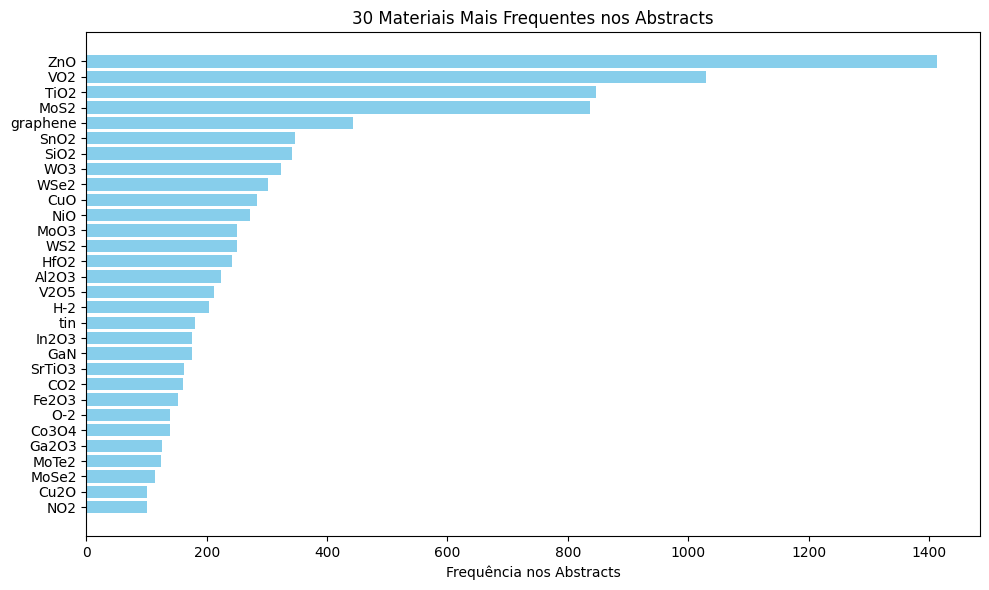

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Garante que a Series está formatada corretamente como DataFrame
top_materiais = materiais_contados.sort_values(ascending=False).head(30).reset_index()
top_materiais.columns = ["Material", "Frequência"]  # renomeia as colunas

# Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(top_materiais["Material"], top_materiais["Frequência"], color="skyblue")
plt.xlabel("Frequência nos Abstracts")
plt.title("30 Materiais Mais Frequentes nos Abstracts")
plt.gca().invert_yaxis()  # materiais mais frequentes no topo
plt.tight_layout()
plt.show()


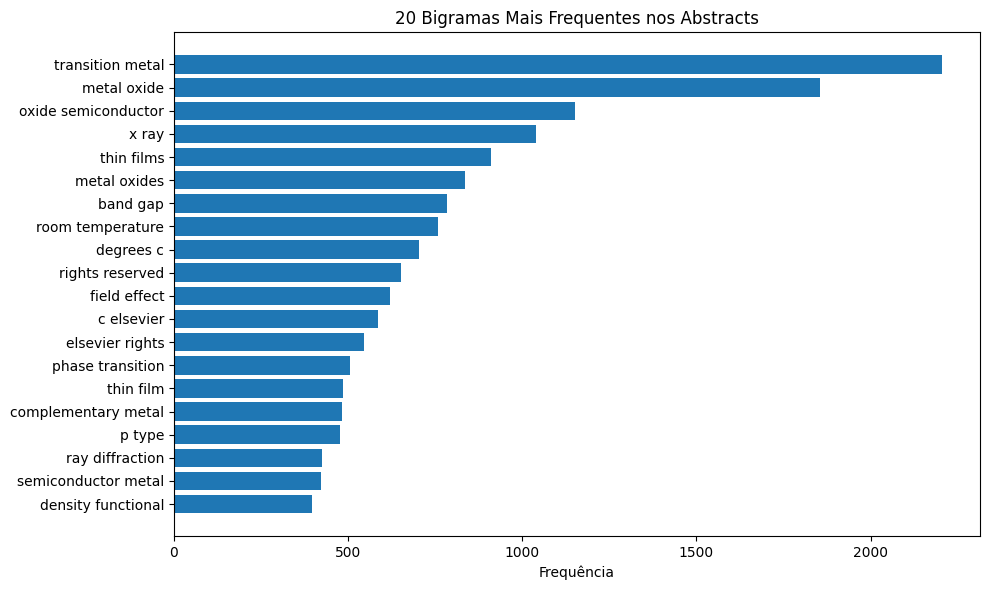

In [73]:
from collections import Counter
from itertools import tee

# Função para gerar bigramas
def generate_bigrams(tokens):
    a, b = tee(tokens)
    next(b, None)
    return list(zip(a, b))

# Gera bigramas de abstracts tokenizados
all_bigrams = []
for text in df["Abstract"].dropna():
    doc = nlp(text)
    tokens = [t.text.lower() for t in doc if t.is_alpha and not t.is_stop]
    all_bigrams.extend(generate_bigrams(tokens))

# Conta os bigramas mais comuns
bigrams_freq = Counter(all_bigrams).most_common(20)

# Converte para visualização
bigram_labels = [f"{w1} {w2}" for (w1, w2), _ in bigrams_freq]
bigram_values = [freq for _, freq in bigrams_freq]

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(bigram_labels, bigram_values)
plt.xlabel("Frequência")
plt.title("20 Bigramas Mais Frequentes nos Abstracts")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [75]:
df["Materiais_Encontrados"]

0                                    [000, cm(2)/V, 2003]
1                                                      []
2       [ReS2, ReS2, ReS2, graphene, rGO, ReS2, rGO, R...
3       [x=0.0, 0.4, 0.6, 0.8, 1.0, 0.0, 1.0, 950, x=0...
4                        [VO2, V2O5, N-2, 45, 1550, 2021]
                              ...                        
4995                                             [13, 15]
4996    [MoS2, 2H, MoS2, MoS2, MoS2, MoS2, nanotube, M...
4997                                               [2000]
4998                             [ZnO, Al2O3, ZnO, Al2O3]
4999                            [Si/SiGe, 2.3, 2015, 3.0]
Name: Materiais_Encontrados, Length: 5000, dtype: object